In [17]:
import numpy as np
import pandas as pd

print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [8]:
data = pd.read_csv("Simulated Dataset.csv", encoding="desired_encoding")


NameError: name 'pd' is not defined

In [4]:
# Drop rows with missing values (if any)
data = data.dropna()

# Verify
print(data.isnull().sum())


tweet_id          0
topic             0
likes             0
retweets          0
replies           0
virality_score    0
temporal_decay    0
Engagement        0
Followers         0
Timestamp         0
user_activity     0
location          0
content           0
hashtags          0
dtype: int64


In [16]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract useful features from the timestamp
data['hour'] = data['Timestamp'].dt.hour
data['day'] = data['Timestamp'].dt.day
data['weekday'] = data['Timestamp'].dt.weekday


NameError: name 'pd' is not defined

In [7]:
from textblob import TextBlob

# Compute sentiment polarity and subjectivity
data['sentiment_polarity'] = data['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['sentiment_subjectivity'] = data['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [8]:
print(data.describe())


             likes    retweets      replies  virality_score  temporal_decay  \
count  5000.000000  5000.00000  5000.000000     5000.000000     5000.000000   
mean   4970.342200  2527.46040  1513.713200        0.491934        0.496652   
min       0.000000     1.00000     0.000000        0.000415        0.010008   
25%    2449.750000  1275.00000   758.750000        0.237106        0.254187   
50%    4911.000000  2521.00000  1514.500000        0.489283        0.494247   
75%    7495.750000  3805.50000  2266.250000        0.739385        0.741495   
max    9998.000000  5000.00000  3000.000000        0.999834        0.989927   
std    2895.556981  1453.25071   859.488381        0.288254        0.281650   

         Engagement     Followers                   Timestamp  user_activity  \
count   5000.000000    5000.00000                        5000     5000.00000   
mean    8559.849200  504860.45200  2023-06-30 22:40:12.492000       50.65620   
min      228.000000     524.00000         2023-0

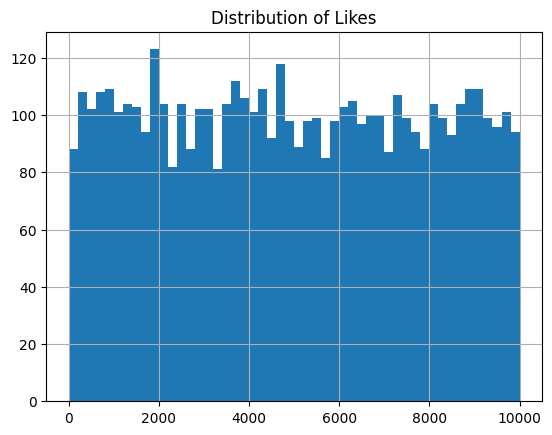

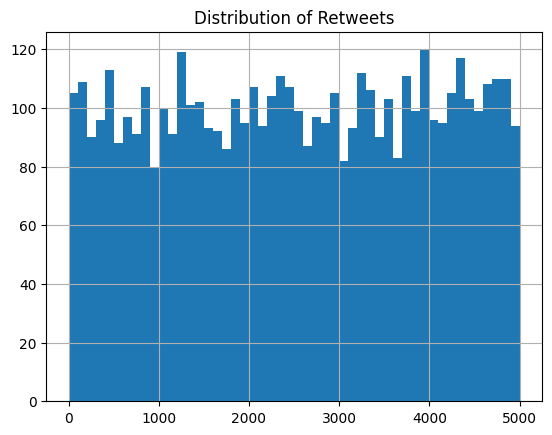

In [9]:
import matplotlib.pyplot as plt

# Histogram for likes
data['likes'].hist(bins=50)
plt.title('Distribution of Likes')
plt.show()

# Histogram for retweets
data['retweets'].hist(bins=50)
plt.title('Distribution of Retweets')
plt.show()

# Add similar code for replies and virality_score


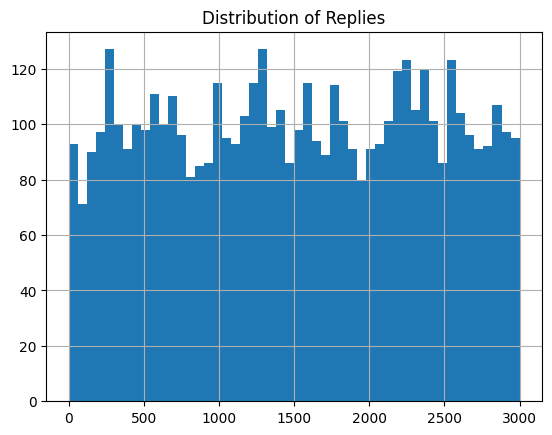

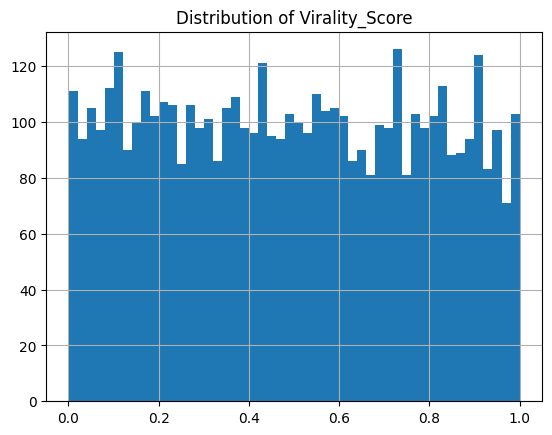

In [11]:
import matplotlib.pyplot as plt

# Create a 2x2 subplot for histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histogram for likes
axes[0, 0].hist(data['like'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Likes')
axes[0, 0].set_xlabel('Likes')
axes[0, 0].set_ylabel('Frequency')

# Plot histogram for retweets
axes[0, 1].hist(data['retweets'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Retweets')
axes[0, 1].set_xlabel('Retweets')
axes[0, 1].set_ylabel('Frequency')

# Plot histogram for replies
axes[1, 0].hist(data['replies'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Replies')
axes[1, 0].set_xlabel('Replies')
axes[1, 0].set_ylabel('Frequency')

# Plot histogram for virality_score
axes[1, 1].hist(data['virality_score'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of Virality Score')
axes[1, 1].set_xlabel('Virality Score')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


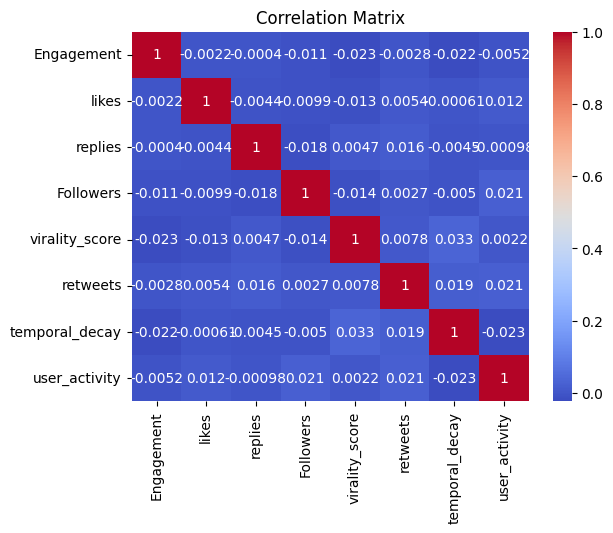

In [15]:
import seaborn as sns

# Correlation matrix
corr_data = data[['Engagement','likes','replies','Followers','virality_score','retweets','temporal_decay','user_activity']]
corr_matrix = corr_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [16]:
import numpy as np
from datetime import datetime

# Assuming today's date for temporal decay calculation
current_date = datetime.now()

# Calculate temporal decay in days
data['temporal_decay_days'] = (current_date - data['Timestamp']).dt.days

# Normalize decay
data['temporal_decay_normalized'] = 1 / (1 + np.exp(data['temporal_decay_days']))


In [17]:
data['engagement_rate'] = (data['likes'] + data['retweets'] + data['replies']) / data['Followers']


In [34]:
from sklearn.model_selection import train_test_split

# Define feature set (X) and target (y)
features = ['likes', 'retweets', 'replies', 'sentiment_polarity', 'temporal_decay_normalized', 'Followers', 'user_activity']
X = data[features]
y = data['virality_score']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.29536125411396275


c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


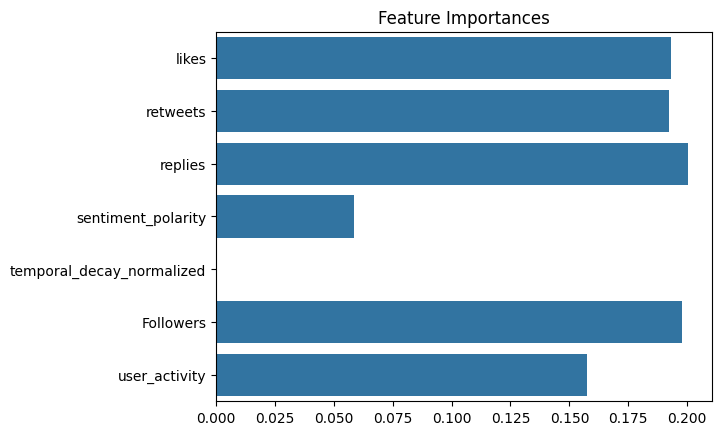

In [36]:
importances = model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()


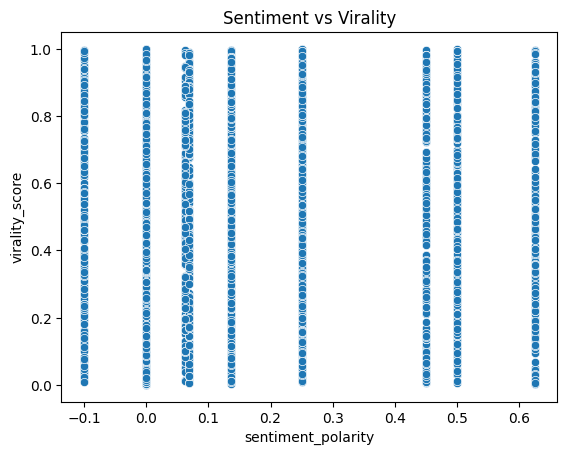

In [21]:
sns.scatterplot(x=data['sentiment_polarity'], y=data['virality_score'])
plt.title('Sentiment vs Virality')
plt.show()


In [22]:
from collections import Counter

# Flatten hashtags list
hashtags = [hashtag for sublist in data['hashtags'].str.split(',').tolist() for hashtag in sublist]
counter = Counter(hashtags)

# Top 10 hashtags
top_hashtags = counter.most_common(10)
print(top_hashtags)


[('#Research', 323), (' #Research', 311), ('#SeriesFinale', 185), (' #Scholarships', 177), (' #Elections', 177), ('#Education', 176), (' #StockMarket', 176), (' #Economy', 175), (' #Learning', 175), ('#Adventure', 171)]


In [39]:
# Define engagement states
def classify_state(row):
    total_engagement = row['likes'] + row['retweets'] + row['replies']
    if total_engagement == 0:
        return 0
    elif 1 <= total_engagement <= 50:
        return 1
    elif 51 <= total_engagement <= 500:
        return 2
    elif total_engagement > 500:
        return 3 if row['virality_score'] < 0.8 else 4

# Apply state classification
data['engagement_state'] = data.apply(classify_state, axis=1)

# Display the first few rows
print(data[['likes', 'retweets', 'replies', 'virality_score', 'engagement_state']].head())


    likes  retweets  replies  virality_score  engagement_state
0  6683.0    2174.0   2514.0        0.552374                 3
1  5459.0    4947.0   2004.0        0.192285                 3
2  3599.0    2719.0   1767.0        0.396164                 3
3  4238.0    2830.0   1150.0        0.416113                 3
4  1846.0    4503.0   2669.0        0.132136                 3


In [40]:
import numpy as np

# Generate state transitions
transitions = data['engagement_state'].values

# Initialize transition matrix
num_states = 5  # States 0–4
transition_matrix = np.zeros((num_states, num_states))

# Compute transition probabilities
for i in range(len(transitions) - 1):
    current_state = transitions[i]
    next_state = transitions[i + 1]
    transition_matrix[current_state, next_state] += 1

# Normalize to probabilities
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Display the transition matrix
print("Transition Matrix:")
print(transition_matrix)


Transition Matrix:
[[           nan            nan            nan            nan
             nan]
 [           nan            nan            nan            nan
             nan]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.47892910e-04 8.04412494e-01
  1.95339613e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.18464730e-01
  1.81535270e-01]]


C:\Users\Rajan\AppData\Local\Temp\ipykernel_28232\182380858.py:17: RuntimeWarning: invalid value encountered in divide
  transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)


In [42]:
from datetime import datetime

# Convert Timestamp to datetime
data['timestamp'] = pd.to_datetime(data['Timestamp'])

# Calculate time intervals (in seconds) between engagements
data = data.sort_values(by='timestamp')
data['time_diff'] = data['timestamp'].diff().dt.total_seconds()

# Fill missing time intervals with the median
median_time_diff = data['time_diff'].median()
data['time_diff'].fillna(median_time_diff, inplace=True)

# Inspect time intervals
print(data[['timestamp', 'time_diff']].head())


               timestamp  time_diff
1975 2023-01-01 00:56:00     4500.0
3994 2023-01-01 06:08:00    18720.0
625  2023-01-01 07:46:00     5880.0
636  2023-01-01 09:08:00     4920.0
4255 2023-01-01 13:05:00    14220.0


Simulated Event Times: [  2.83563565   4.06038533   5.7687842    5.91039387   6.74259424
   7.07064449   7.33055378   7.46519621   7.65816018   8.22051058
   8.22378743   8.67408225   9.33194336   9.51074673   9.82199798
   9.90679651   9.96939593  10.11775042  10.13007624  10.59295055
  11.24947877  11.87524909  12.09657356  12.1822433   12.19765523
  12.65373438  13.23922087  13.90080152  14.05849347  14.54440184
  15.68476771  16.41107201  16.79159392  18.52769408  20.00691009
  20.18379152  21.01730646  21.66509006  22.30946819  25.66129304
  26.09643688  26.13910481  26.15982988  26.86693781  28.30570956
  28.66435308  29.31113789  31.00438306  31.17545303  31.63022623
  32.12520513  32.24406248  32.47499888  32.91575253  33.01558967
  33.61384576  34.15250587  34.54863232  35.66919838  35.76033842
  35.86117327  36.20920746  36.44418016  36.73908646  37.11543923
  38.75596005  39.35278439  40.68241442  41.58539727  41.98631434
  42.42918487  42.62898186  42.68525946  43.34043453 

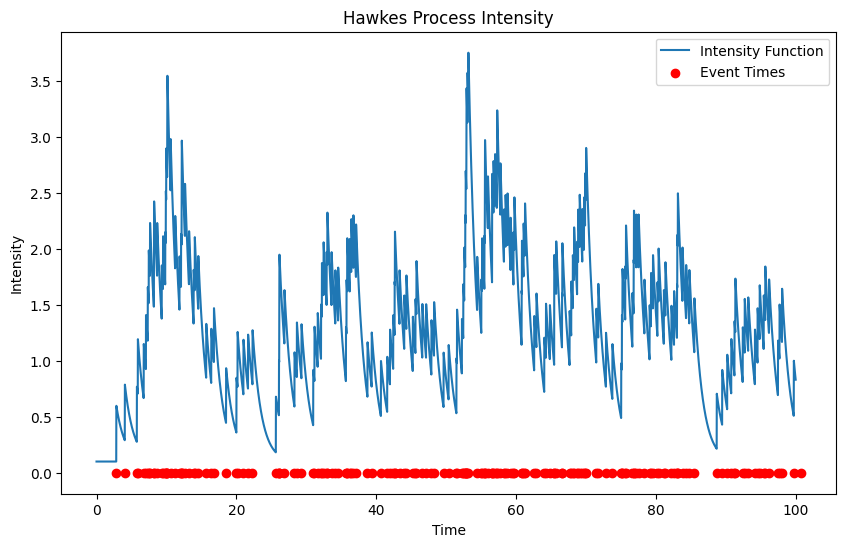

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 0.1  # Base intensity
alpha = 0.5  # Excitation factor
beta = 0.8  # Decay rate
T = 100  # Total time for the process

# Initialize simulation
event_times = []
current_time = 0

while current_time < T:
    # Calculate the current intensity
    if len(event_times) == 0:
        intensity = mu
    else:
        intensity = mu + np.sum(alpha * np.exp(-beta * (current_time - np.array(event_times))))
    
    # Generate the next event time
    time_to_next_event = np.random.exponential(scale=1 / intensity)
    current_time += time_to_next_event
    
    # Accept or reject the event based on intensity
    if np.random.uniform(0, 1) < (intensity / (mu + alpha)):
        event_times.append(current_time)

# Convert to numpy array for easier processing
event_times = np.array(event_times)

# Display the simulated event times
print("Simulated Event Times:", event_times)

# Plot the event intensity over time
time_grid = np.linspace(0, T, 5000)
intensities = [mu + np.sum(alpha * np.exp(-beta * (t - event_times[event_times < t]))) for t in time_grid]

plt.figure(figsize=(10, 6))
plt.plot(time_grid, intensities, label='Intensity Function')
plt.scatter(event_times, [0] * len(event_times), color='red', label='Event Times')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Hawkes Process Intensity')
plt.legend()
plt.show()



In [56]:
# Calculate total engagement (likes, retweets, replies) per unit time
time_duration = (data['timestamp'].max() - data['timestamp'].min()).total_seconds()  # Total time span in seconds
total_events = data[['likes', 'retweets', 'replies']].sum().sum()  # Total engagement events
lambda_rate = total_events / time_duration  # Engagement rate per second

print("Estimated Poisson Rate (λ):", lambda_rate)



Estimated Poisson Rate (λ): 1.4290818559651675


In [57]:
from scipy.stats import poisson

# Simulate engagement events
simulated_events = poisson.rvs(mu=lambda_rate, size=5000)

# Inspect simulated events
print("Simulated Engagement Events:", simulated_events[:10])


Simulated Engagement Events: [1 4 2 2 5 2 3 3 1 2]


In [59]:
from scipy.optimize import minimize

def hawkes_log_likelihood(params, event_times, T):
    mu, alpha, beta = params
    log_likelihood = 0

    # Compute log-likelihood for observed events
    for i, t in enumerate(event_times):
        intensity = mu + np.sum(alpha * np.exp(-beta * (t - event_times[:i])))
        log_likelihood += np.log(intensity)

    # Compute integral term (Riemann sum approximation)
    time_grid = np.linspace(0, T, 1000)
    intensity_grid = [
        mu + np.sum(alpha * np.exp(-beta * (t - event_times[event_times < t]))) for t in time_grid
    ]
    integral = np.sum(intensity_grid) * (T / len(time_grid))

    return -(log_likelihood - integral)  # Negative because we minimize

# Initial guesses for mu, alpha, beta
initial_params = [0.1, 0.5, 0.3]

# Optimize parameters
result = minimize(
    hawkes_log_likelihood,
    initial_params,
    args=(event_times, T),
    bounds=[(0, None), (0, None), (0, None)]
)

# Output the estimated parameters
mu_est, alpha_est, beta_est = result.x
print("Estimated Parameters:")
print(f"Baseline Intensity (μ): {mu_est}")
print(f"Excitation Factor (α): {alpha_est}")
print(f"Decay Rate (β): {beta_est}")



Estimated Parameters:
Baseline Intensity (μ): 1.1262246495040338
Excitation Factor (α): 0.13927469987262026
Decay Rate (β): 0.32752872857992016


In [61]:
import pandas as pd
import numpy as np

# Assuming your data has a 'timestamp' column
# Convert timestamps to seconds since the start of observation
data['numeric_timestamp'] = (data['timestamp'] - data['timestamp'].min()).dt.total_seconds()
event_times_numeric = event_times - event_times.min()  # Align the scale

# Compute temporal decay (intensity) for each tweet
def compute_intensity(event_times, mu, alpha, beta, t):
    # Ensure that t and event_times are numeric
    past_events = event_times[event_times < t]
    intensity = mu + np.sum(alpha * np.exp(-beta * (t - past_events)))
    return intensity

# Apply to dataset using the numeric timestamp
data['hawkes_intensity'] = data['numeric_timestamp'].apply(
    lambda t: compute_intensity(event_times_numeric, mu_est, alpha_est, beta_est, t)
)

# Preview dataset with Hawkes intensity
print(data[['numeric_timestamp', 'hawkes_intensity']].head())


      numeric_timestamp  hawkes_intensity
1975                0.0          1.126225
3994            18720.0          1.126225
625             24600.0          1.126225
636             29520.0          1.126225
4255            43740.0          1.126225


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target
X = data[['likes', 'retweets', 'replies', 'hawkes_intensity']]
y = (data['virality_score'] > 0.7).astype(int)  # Virality threshold

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.682
